# LDA

### Importing Modules

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets


### Load the dataset

In [36]:
iris = datasets.load_iris()
print(dir(iris))
print(iris.feature_names)
print(iris.target_names)
dataset = pd.DataFrame(iris.data , columns = iris.feature_names)
dataset['target'] = iris.target
dataset.head()
dataset.tail(10)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


### Dividing the dataset into class and target variables

In [37]:
X = dataset.iloc[:, 0:4].values #classes
Y = dataset.iloc[:, 4].values #target 

### Preprocesses and divide into train and test

In [38]:
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
Y = le.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# print(X_test)

### Apply LDA

In [39]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)

### Scatter plot

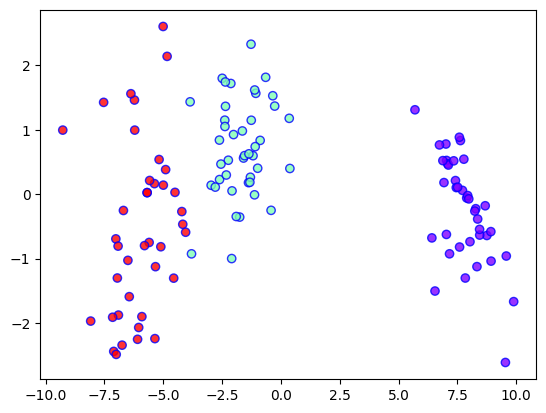

In [49]:
%matplotlib inline
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap='rainbow', alpha=0.8, edgecolors='b')

### Classify using random forest classifier

In [41]:
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, Y_train)
Y_predict = rfc.predict(X_test)

### Accuracy and Confusion matrix

In [42]:
accuScore = accuracy_score(Y_test, Y_predict)
confuMatrix = confusion_matrix(Y_test, Y_predict)
print(accuScore)
print(confuMatrix)

0.9333333333333333
[[11  0  0]
 [ 0  7  1]
 [ 0  1 10]]
